In [1]:
# 다중회귀(multiple regression)

In [2]:
import pandas as pd
df = pd.read_csv('https://bit.ly/perch_csv_data')


In [3]:
df.head()

,length,height,width
0,8.4,2.11,1.41
1,13.7,3.53,2.00
2,15.0,3.82,2.43
3,16.2,4.59,2.63
4,17.4,4.59,2.94


In [4]:
# dataframe을 numpy array로 변환
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [5]:
import numpy as np

perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [6]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_full, perch_weight, random_state= 42
)

In [7]:
# 사이킷런의 변환기(transformer) : 특성을 만들거나 전처리 하기 위한 클래스
# PolynomialFeatures : transformer 중 하나

In [8]:
from sklearn.preprocessing import PolynomialFeatures

In [9]:
# 샘플 예시
poly = PolynomialFeatures()
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [10]:
# PolynomialFeatures 클래스
# 기본적으로 각 특성을 제곱한 항을 추가하고 특성끼리 서로 곱한 항을 추가한다.
# 1은 절편 항의 계수라고 보면 되며, 특성으로 자동 추가된다. 

In [22]:
poly = PolynomialFeatures(include_bias=False) # 자동으로 추가되는 1 제외시킴.
poly.fit([[2,3]])
print(poly.transform([[2,3]]))

[[2. 3. 4. 6. 9.]]


In [12]:
# train_input에 적용

poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
print(train_poly.shape)
poly.get_feature_names() # 9개의 각 특성 호출

(42, 9)


C:\Users\youth_0619\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [13]:
test_poly = poly.transform(test_input)

In [15]:
# 다중 회귀 모델 훈련
# 여러 개의 특성을 사용해서 선형회귀를 수행.

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target)) # 높은 점수 나옴.

0.9903183436982124


In [17]:
print(lr.score(test_poly, test_target)) # train set 점수보다 낮게 나와 과소적합 문제 해결

0.9714559911594199


In [25]:
# 특성 더 추가(degree로 필요한 고차항의 최대 차수 지정)
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [26]:
# 특성의 개수가 55개 만들어짐.

In [27]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9999999999997439


In [28]:
print(lr.score(test_poly, test_target))

-144.40564427629454


In [29]:
# 엄청 큰 음수가 나온 이유
# 특성 개수가 나오면 훈련세트에 대해 거의 완벽하게 학습할 수 있으나, 훈련모델에 너무 과대적합되어 테스트세트에서는 점수가 형편없이 나옴

In [30]:
# 규제를 사용해서 과대적합을 줄여보자

In [31]:
# 규제(regulation)
# 모델이 훈련세트에 과대적합되지않도록 만든다.
# 선형회귀모델의 경우 특성에 곱해지는 계수의 크기를 작게 만든다.

In [32]:
# 규제 적용 전 정규화(normalization)

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [33]:
# 선형회귀모델에 규제를 추가한 모델을 릿지와 라쏘 라고 한다.
# 릿지는 계수를 제곱한 값을 기준으로 규제를 적용 (일반적으로 선호)
# 라쏘는 계수의 절댓값을 기준으로 규제를 적용.
# 두 알고리즘 모두 계수의 크기를 줄이지만, 라쏘는 0으로 만들 수 있다.

In [34]:
# 릿지(ridge) 회귀
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.9896101671037343


In [35]:
print(ridge.score(test_scaled, test_target))

0.9790693977615391


In [36]:
# 규제 양 조절방법(alpha 하이퍼파라미터 조절)
# alpha값이 크면 규제 강도가 세짐, 계수값을 더 줄임, 과소적합되게 유도
# alpha값이 작으면 규제 강도가 약해지며, 계수값이 덜 줄고 과대적합되게 유도

In [37]:
# 하이퍼파라미터(hyperparameter)
# 머신러닝 모델이 학습할 수 없고 사람이 알려줘야 하는 파라미터.

In [38]:
# 적절한 alpha값 찾는 방법
# alpha값에 대한 R^2의 그래프를 그려보기
import matplotlib.pyplot as plt
train_score = []
test_score = []

In [39]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

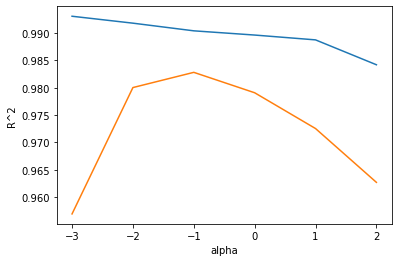

In [42]:
# alpha값의 범위때문에 x축 동일간격으로 표현하려고 로그함수 사용
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [43]:
# 훈련세트, 테스트세트 점수차가 크며, 오른쪽으로 갈수록 과소적합 양상 보인다.
# 적절한 alpha값은 10^-1, 즉 0.1이다.

In [45]:
ridge = Ridge(alpha = 0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570365
0.9827976465386884


In [46]:
# 라쏘(lasso) 모델
# 릿지회귀와 거의 유사

In [47]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))

0.989789897208096


In [48]:
print(lasso.score(test_scaled, test_target))

0.9800593698421883
